In [3]:
import praw

reddit = praw.Reddit(client_id='Pj5o8QpNXXJY9A',
                    client_secret='pQKMRBmhp0In48NoNvvktfRo2eA',
                    pasword = 'prawisgreat',
                    user_agent='Reddit Unlocked CS196 Project @ UIUC',
                    username='RedditUnlocked196')
news = reddit.subreddit('news')
for submission in news.top('year'):
    print(submission.url)

Version 5.1.0 of praw is outdated. Version 5.2.0 was released Tuesday October 24, 2017.
https://www.nytimes.com/2017/11/21/technology/fcc-net-neutrality.html
http://www.independent.co.uk/news/world/asia/japanese-firm-piala-inc-tokyo-non-smokers-extra-six-days-holiday-cigarette-break-a8028541.html
http://wtkr.com/2017/07/20/tmz-report-chester-bennington-of-linkin-park-commits-suicide/
http://www.reuters.com/article/us-usa-trump-immigration-idUSKBN15E1DE
https://arstechnica.com/tech-policy/2017/11/comcast-quietly-drops-promise-not-to-charge-tolls-for-internet-fast-lanes/
http://abcn.ws/2qPcnnU
http://www.prnewswire.com/news-releases/american-icon-and-playboy-founder-hugh-m-hefner-has-died-300527267.html
https://lbpost.com/life/pets/2000011459-pet-store-bill-passes-california-senate-38-to-0
http://money.cnn.com/2017/02/24/media/cnn-blocked-white-house-gaggle/index.html
https://www.independent.co.uk/news/uk/home-news/billy-caldwell-cannabis-oil-boy-seizures-stopped-cured-prescription-medic

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import plotly
plotly.tools.set_credentials_file(username='reddit_unlocked', api_key='gfnXKc7JvUKST4HRJyFX')
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.graph_objs import *

In [5]:
top10news_df = pd.DataFrame({
    'title': (),
    'url' : (),
    'upvote_percentage': (),
    'year_posted': (),
    'month_posted': (),
    'day_posted': (),
    'is_self': (),
    'is_video': (),
    'media': (),
    'domain': (),
    'upvotes': (),
    'downvotes': (),
    'score': (),
    'views': ()
})
for submission in news.top('year', limit = 50):
    s = pd.Series([submission.title, submission.url, submission.upvote_ratio * 100,
                   datetime.utcfromtimestamp(submission.created_utc).year,
                  datetime.utcfromtimestamp(submission.created_utc).month,
                  datetime.utcfromtimestamp(submission.created_utc).day,
                  submission.is_self, submission.is_video, submission.media, submission.domain,
                   submission.score, submission.view_count,
                   int((submission.score * submission.upvote_ratio)/(2 * submission.upvote_ratio - 1))],
                  index=['title','url','upvote_percentage', 'year_posted', 'month_posted',
                         'day_posted', 'is_self', 'is_video', 'media', 'domain', 'score','views', 'upvotes'])
    top10news_df = top10news_df.append(s, ignore_index=True)
top10news_df['downvotes'] = top10news_df['upvotes'] - top10news_df['score']
top10news_df

,day_posted,domain,downvotes,is_self,is_video,media,month_posted,score,title,upvote_percentage,upvotes,url,views,year_posted
0,21.0,nytimes.com,16674.0,0.0,0.0,None,11.0,175080.0,F.C.C. Announces Plan to Repeal Net Neutrality,92.0,191754.0,https://www.nytimes.com/2017/11/21/technology/...,None,2017.0
1,31.0,independent.co.uk,8550.0,0.0,0.0,None,10.0,125414.0,Japanese firm gives non-smokers extra six days...,94.0,133964.0,http://www.independent.co.uk/news/world/asia/j...,None,2017.0
2,20.0,wtkr.com,29118.0,0.0,0.0,None,7.0,123754.0,Chester Bennington of Linkin Park commits suicide,84.0,152872.0,http://wtkr.com/2017/07/20/tmz-report-chester-...,None,2017.0
3,31.0,reuters.com,37244.0,0.0,0.0,None,1.0,121536.0,U.S. President Donald Trump fired the federal ...,81.0,158780.0,http://www.reuters.com/article/us-usa-trump-im...,None,2017.0
4,27.0,arstechnica.com,11037.0,0.0,0.0,None,11.0,115890.0,Comcast quietly drops promise not to charge to...,92.0,126927.0,https://arstechnica.com/tech-policy/2017/11/co...,None,2017.0
5,9.0,abcn.ws,17379.0,0.0,0.0,None,5.0,110067.0,James Comey terminated as Director of FBI,88.0,127446.0,http://abcn.ws/2qPcnnU,None,2017.0
6,28.0,prnewswire.com,25459.0,0.0,0.0,None,9.0,108203.0,"American Icon and Playboy Founder, Hugh M. Hef...",84.0,133662.0,http://www.prnewswire.com/news-releases/americ...,None,2017.0
7,13.0,lbpost.com,10190.0,0.0,0.0,None,9.0,107000.0,Pet Store Bill Passes California Senate 38 to ...,92.0,117190.0,https://lbpost.com/life/pets/2000011459-pet-st...,None,2017.0
8,24.0,money.cnn.com,24082.0,0.0,0.0,None,2.0,102352.0,CNN banned from White House press briefing,84.0,126434.0,http://money.cnn.com/2017/02/24/media/cnn-bloc...,None,2017.0
9,7.0,independent.co.uk,26133.0,0.0,0.0,None,9.0,101459.0,Boy who suffered up to 100 seizures a day has ...,83.0,127592.0,https://www.independent.co.uk/news/uk/home-new...,None,2017.0


#For me to know the fields available
top10news_df = pd.DataFrame({
    'title': (),
    'url' : (),
    'upvote_percentage': (),
    'year_posted': (),
    'month_posted': (),
    'day_posted': (),
    'is_self': (),
    'is_video': (),
    'media': (),
    'domain': (),
    'upvotes': (),
    'downvotes': (),
    'score': (),
    'views': ()
})

In [6]:
from textblob import TextBlob, Word, Blobber
import newspaper
from newspaper import Article
import operator
import rake as rake
from datetime import datetime
rake_object = rake.Rake("SmartStoplist.txt", 1, 2, 1)

[('compatibility', 1.0), ('of', 1.0), ('systems', 1.0), ('linear', 1.0), ('constraints', 1.0), ('over', 1.0), ('the', 1.0), ('set', 1.0), ('natural', 1.0), ('numbers', 1.0), ('criteria', 1.0), ('system', 1.0), ('diophantine', 1.0), ('equations', 1.0)]
[('minimal generating sets', 8.666666666666666), ('linear diophantine equations', 8.5), ('minimal supporting set', 7.666666666666666), ('minimal set', 4.666666666666666), ('linear constraints', 4.5), ('natural numbers', 4.0), ('strict inequations', 4.0), ('nonstrict inequations', 4.0), ('upper bounds', 4.0), ('mixed types', 3.666666666666667), ('considered types', 3.166666666666667), ('set', 2.0), ('types', 1.6666666666666667), ('considered', 1.5), ('compatibility', 1.0), ('systems', 1.0), ('criteria', 1.0), ('system', 1.0), ('components', 1.0), ('solutions', 1.0), ('algorithms', 1.0), ('construction', 1.0), ('constructing', 1.0), ('solving', 1.0)]


In [11]:
# This is the function in run_praw.py, so I'm using it as a reference for all my algs
def display_praw(name):
    reddit = praw.Reddit(client_id='Pj5o8QpNXXJY9A',
                         client_secret='pQKMRBmhp0In48NoNvvktfRo2eA',
                         password='prawisgreat',
                         user_agent='Reddit Unlocked CS196 Project @ UIUC',
                         username='RedditUnlocked196')

    subreddit = reddit.subreddit(name)

    threads_df = pd.DataFrame({
        'Title': (),
        'URL': (),
        'Upvote Ratio (%)': (),
        'Net Score': (),
        '# of Upvotes': (),
        '# of Downvotes': (),
        'Post Date': (),
        'Self Post?': (),
        'Video Post?': (),
        'Domain': ()
    })

    threads_df = threads_df[['Title', 'URL', 'Upvote Ratio (%)', 'Net Score', '# of Upvotes', '# of Downvotes',
                             'Post Date', 'Self Post?', 'Video Post?', 'Domain']]

    for thread in subreddit.top('year', limit=15): # TODO: change limit number when actually deploying program. 15 is the testing number.
        actualUps = int((thread.upvote_ratio * thread.score) / (thread.upvote_ratio * 2 - 1))
        actualDowns = actualUps - thread.score
        gather = pd.Series([thread.title, thread.url, thread.upvote_ratio * 100, thread.score,
                            actualUps, actualDowns, thread.created_utc,
                            thread.is_self, thread.is_video, thread.domain],
                           index=['Title', 'URL', 'Upvote Ratio (%)', 'Net Score', '# of Upvotes', '# of Downvotes',
                                  'Post Date', 'Self Post?', 'Video Post?', 'Domain'])
        threads_df = threads_df.append(gather, ignore_index=True)

    threads_dict = threads_df.to_dict(orient='records')

    for entry in threads_dict:
        if isinstance(str(entry['Post Date']), str):
            time = datetime.fromtimestamp(entry['Post Date'])
            formatTime = time.strftime('%b %d, %Y')
        else:
            formatTime = None

        entry['Post Date'] = formatTime

    return threads_dict

# For runtime comparison
start_time = datetime.now()

# Transforms dict returned by display_praw into DataFrame for working with
top10news_df = pd.DataFrame.from_dict(display_praw('news'))

words = {}

## NEWSPAPER STUFF HERE ##

# Get keywords out of all articles
for i in range(len(top10news_df)):
    #top10news_df.iloc[i]['url']
    myArticle = Article(top10news_df.iloc[i]['URL'])
    myArticle.download()
    myArticle.parse()
    myArticle.nlp()
    
    # Run sentiment analysis on each article, fetch subjectivity and polarity
    text = myArticle.text
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    
    # Get associated Reddit post info for each keyword, store in dictionary
    for keyword in myArticle.keywords:
        
        # Don't waste time with numeric keywords, skip them if they contain numbers
        if any(char.isdigit() for char in keyword):
            continue        
            
        if keyword not in words:
            words[keyword] = [keyword, 1, 
                              top10news_df.iloc[i]['# of Upvotes'],
                              top10news_df.iloc[i]["# of Downvotes"], 
                              top10news_df.iloc[i]["Net Score"],
                              subjectivity, polarity, 
                              top10news_df.iloc[i]["Domain"]]
        else:
            words[keyword][1] += 1
            words[keyword][2] += top10news_df.iloc[i]['# of Upvotes']
            
    ## RAKE STUFF HERE ##
    
    # Pull keywords from title strings
    for wordPair in rake_object.run(top10news_df.iloc[i]['Title']):
        currentWord = wordPair[0]
        
        # Don't waste time with numeric keywords, skip them if they contain numbers
        if any(char.isdigit() for char in currentWord):
            continue
        
        # Grab associated Reddit post data for each keyword, store in dictionary
        if currentWord not in words:
            words[currentWord] = [currentWord, 1, 
                              top10news_df.iloc[i]['# of Upvotes'],
                              top10news_df.iloc[i]["# of Downvotes"], 
                              top10news_df.iloc[i]["Net Score"],
                              subjectivity, polarity, 
                              top10news_df.iloc[i]["Domain"]]
        else:
            words[currentWord][1] += 1
            words[currentWord][2] += int(top10news_df.iloc[i]['# of Upvotes'])
            words[currentWord][3] += int(top10news_df.iloc[i]['# of Downvotes'])
            words[currentWord][4] += int(top10news_df.iloc[i]['Net Score'])
    

### FOR GARY'S USE ###
# Output dictionary is named 'words' #
# Format is as such: #
# key = keyword #
# value = [Occurences, Upvotes, Downvotes, Score, Subjectivity, Polarity, Domain] #
    
keywords_df = pd.DataFrame(words, index=['Keyword',
                                         'Occurences',
                                         'Upvotes', 
                                         'Downvotes', 
                                         "Score", 
                                         "Subjectivity", 
                                         "Polarity", 
                                         "Domain"])

keywords_df = keywords_df.transpose().set_index('Keyword').sort_values('Occurences', ascending=False)
print(datetime.now() - start_time)
keywords_df

0:01:01.393278


,Occurences,Upvotes,Downvotes,Score,Subjectivity,Polarity,Domain
Keyword,,,,,,,
trump,5,714106,8550,125414,0.256756,-0.00759651,independent.co.uk
neutrality,3,420923,16674,175078,0.385367,0.083532,nytimes.com
day,3,357449,52270,202936,0.299295,0.115873,independent.co.uk
video,3,337183,28460,201812,0.428571,0.154487,independent.co.uk
net,3,420923,16674,175078,0.385367,0.083532,nytimes.com
rules,3,420923,16674,175078,0.385367,0.083532,nytimes.com
president,3,428880,8550,125414,0.256756,-0.00759651,independent.co.uk
repeal,3,420923,16674,175078,0.385367,0.083532,nytimes.com
white,3,412660,37245,121537,0.362776,0.0783074,reuters.com


In [25]:
keywords_df

,Occurences,Upvotes,Downvotes,Score,Subjectivity,Polarity,Domain
Keyword,,,,,,,
trump,12,1.46164e+06,37568,199246,0.256756,-0.00759651,independent.co.uk
rules,7,782596,16654,174876,0.385367,0.083532,nytimes.com
white,7,851710,37246,121540,0.362776,0.0783074,reuters.com
day,7,791702,93326,285041,0.299295,0.115873,independent.co.uk
fcc,6,666129,25138,263960,0.385367,0.083532,nytimes.com
neutrality,6,694992,16654,174876,0.385367,0.083532,nytimes.com
state,6,649956,47435,228525,0.362776,0.0783074,reuters.com
president,6,771941,8548,125375,0.256756,-0.00759651,independent.co.uk
net,6,694992,16654,174876,0.385367,0.083532,nytimes.com


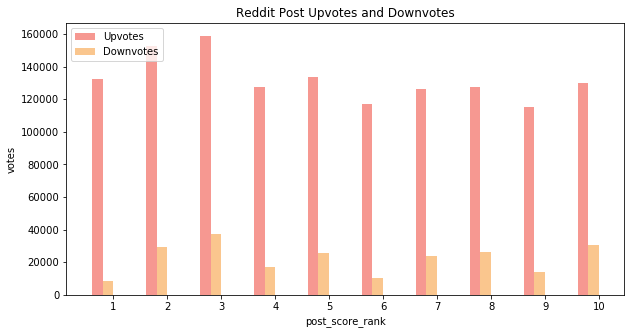

/Users/AlexBraznichenko/miniconda3/lib/python3.6/site-packages/plotly/matplotlylib/renderer.py:481: UserWarning:

I found a path object that I don't think is part of a bar chart. Ignoring.



In [4]:
#code reference from https://chrisalbon.com/python/matplotlib_grouped_bar_plot.html
pos = list(range(len(top10news_df['title'])))
width = .2

fig, ax = plt.subplots(figsize = (10,5))
plt.bar(pos, 
        #using df['upvotes'] data,
        top10news_df['upvotes'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label the first value in title
        label=top10news_df['title'][0]) 
plt.bar([p + width for p in pos],
       top10news_df['downvotes'],
        width,
        alpha = .5,
        color='#F78F1E',
        label=top10news_df['title'][1]
       )
ax.set_ylabel('votes')
ax.set_xlabel('post_score_rank')
ax.set_title('Reddit Post Upvotes and Downvotes')
ax.set_xticks([p + 1.5 * width for p in pos])
ax.set_xticklabels(range(1,11))
plt.legend(['Upvotes', 'Downvotes'], loc='upper left')
plt.show()
py.iplot_mpl(fig)

In [12]:
#plotly interactive barchart testing
#code reference from https://plot.ly/python/ipython-notebook-tutorial/#plotting-interactive-maps
trace_upvotes = Bar(x=top10news_df.title,
                   y=top10news_df.upvotes,
                   name='Upvotes',
                   text = top10news_df.title,
                   textposition = 'auto',
                   marker=dict(color='#FFCDD2'))

trace_downvotes = Bar(x=top10news_df.title,
                     y=top10news_df.downvotes,
                     name='Downvotes',
                     marker=dict(color='#A2D5F2'))
data = [trace_upvotes, trace_downvotes]
layout = Layout(title="Reddit Post Upvotes and Downvotes",
               xaxis=dict(title='title'))
fig=Figure(data=data, layout=layout)
url = py.plot(fig, filename = 'barchart')
print(url)
#write function that takes in data frame and returns String of the url
#for the plotly interactive graph

https://plot.ly/~reddit_unlocked/108


In [19]:
trace1 = go.Scatter(
    x = top10news_df.month_posted,
    y = top10news_df.score,
    mode = 'markers+text',
    marker = dict(
        size = (top10news_df.upvotes + top10news_df.downvotes) / 200000 * 40,
        color = top10news_df.upvote_percentage,
        colorscale = 'Portland',
        showscale = True
    ),
    text = top10news_df.domain,
    textposition = 'bottom',
    textfont=dict(
        family='sans serif',
        size=18,
        color='#ff7f0e')
)
layout = go.Layout(
    title = 'Stats of top reddit/r/news posts',
    xaxis = dict(
        title = 'month_posted',
        ticks = 12,
    ),
    yaxis = dict(
        title = 'score',
        ticklen = 5,
    )
)
data = [trace1]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'reddit plot')

In [9]:
#Keyword incorporation
import newspaper
from newspaper import Article
import operator
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/AlexBraznichenko/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [8]:
from textblob import TextBlob

In [9]:
######################
#                    #
#   keyword search   #
#                    #
######################

import newspaper
from newspaper import Article
import operator
import rake as rake
rake_object = rake.Rake("SmartStoplist.txt", 1, 2, 1)

In [10]:
words = {}

for i in range(len(top10news_df)):
    #top10news_df.iloc[i]['url']
    myArticle = Article(top10news_df.iloc[i]['url'])
    myArticle.download()
    myArticle.parse()
    myArticle.nlp()
    for keyword in myArticle.keywords:
        if keyword not in words:
            words[keyword] = [keyword, 1, top10news_df.iloc[i]['upvotes']]
        else:
            words[keyword][1] += 1
            words[keyword][2] += top10news_df.iloc[i]['upvotes']
    #RAKE STUFF HERE
    for wordPair in rake_object.run(top10news_df.iloc[i]['title']):
        currentWord = wordPair[0]
        #print(currentWord)
        if currentWord not in words:
            words[currentWord] = [currentWord, 1, top10news_df.iloc[i]['upvotes']]
        else:
            words[currentWord][1] += 1
            words[currentWord][2] += top10news_df.iloc[i]['upvotes']
keywords_df = pd.DataFrame(words, index=['Keyword','Occurences','Upvotes'])
keywords_df = keywords_df.transpose().set_index('Keyword')
keywords_df

KeyError: 'url'

In [18]:
words = []
for i in range(0, len(top10news_df['title'])):
    if (top10news_df['is_self'][i] == 0.0):
        a = Article(top10news_df['url'][i], language = 'en')
        a.download()
        a.parse()
        a.text
        a.nlp()
        for word in a.text:
            words.append(TextBlob(word))
print(words)
proper_df
for post in words:
    for word in post.tags:
        if word[1] == 'NNP':
            if keywords_df.contains(word[0]) and keywords_df['Occurences'][word[0]] > 1:
                proper_df.append(word[0])
proper_nouns

['firm', 'nonsmokers', 'national', 'world', 'cigarette', 'days', 'holiday', 'compensate', 'security', 'extra', 'breaks', 'near', 'opposition', 'election', 'kenya', 'military', 'gives', 'japanese', '2017', 'woman']
['41', 'true', 'park', 'dead', 'bennington', 'soon', 'success', 'linkin', 'suicide', 'band', 'shinoda', 'singer', 'remember', 'chester', 'wonder', 'statement', 'album']
['state', 'lawyer', 'immigration', 'department', 'states', 'justice', 'defied', 'order', 'house', 'yates', 'trumps', 'united', 'white', 'dumps', 'trump', 'fired']
['confidence', 'general', 'white', 'director', 'comey', 'amid', 'fbi', 'spicer', 'president', 'russia', 'probe', 'trump', 'fired', 'attorney']
['icon', 'hefner', 'magazine', 'playboy', 'inducted', 'world', 'hugh', 'died', 'm', 'enterprises', 'award', 'american', 'mr', 'honored', 'founder']
['vote', '38', 'bill', 'california', 'senate', 'animals', 'dogs', 'passed', 'shelters', 'pet', 'store', 'pets', '485', 'passes']
['media', 'organizations', 'office

[]

In [66]:
#takes a dictionary of dictionaries of keywords from body text as input and returns the url for the plotly html embedding of
#scatterplot made from the keywords and their attributes
#'Keyword','Occurences', 'Upvotes', 'Downvotes',  "Score", "Subjectivity", "Polarity", "Domain"
def body_to_graph(words = {}, subreddit = str):
    """
    :type subreddit: String
    """
    frames = []
    #Turns dictionary of dictionaries into list of dataframes
    for key, value in words.items():
        frames.append(pd.DataFrame(data = value, columns = [key], index = ['Keyword','Occurences', 'Upvotes', 'Downvotes', 'Score', 'Subjectivity', 'Polarity', 'Domain']).transpose())
    #Concatenates the list of dataframes
    data_df = pd.concat(frames)
    trace1 = go.Scatter(
        y = data_df.Subjectivity, #Subjectivity of the text the keyword was found in on y axis
        x = data_df.Occurences * data_df.Score,#Occurrences * Score on x-axis for more spread out data
        mode = 'markers',
        marker = dict(
            size =  (data_df.Occurences) * 20, #Occurrences of Keyword for size
            color = data_df.Polarity, #Polarity for color of the post (blue is sad, red is happy)
            colorscale = 'Portland',
            showscale = True
        ),
        text = "Keyword: " + data_df.Keyword
    )
    layout = go.Layout(
        annotations=Annotations([
            Annotation(
                x=0.5004254919715793,
                y=-0.16191064079952971,
                showarrow=False,
                text='Custom x-axis title',
                xref='paper',
                yref='paper'
            ),
            Annotation(
                x=-0.04944728761514841,
                y=0.4714285714285711,
                showarrow=False,
                text='Custom y-axis title',
                textangle=-90,
                xref='paper',
                yref='paper'
            )
        ]),
        title = 'Stats of top reddit/r/' + subreddit + ' keywords',
        yaxis = dict(
            title = 'Subjectivity',
            ticks = 5,
        ),
        xaxis = dict(
            title = 'popularity',
            ticklen = 10,
        )
    )
    data = [trace1]
    fig = go.Figure(data = data, layout = layout)
    url = py.plot(fig, filename = 'reddit plot')
    return "" + url

In [67]:
body_to_graph(words, "news")

{'repeal': ['repeal', 3, 420923.0, 16674.0, 175078.0, 0.38536679184269534, 0.08353196335124047, 'nytimes.com'], 'net': ['net', 3, 420923.0, 16674.0, 175078.0, 0.38536679184269534, 0.08353196335124047, 'nytimes.com'], 'companies': ['companies', 1, 191752.0, 16674.0, 175078.0, 0.38536679184269534, 0.08353196335124047, 'nytimes.com'], 'telecom': ['telecom', 1, 191752.0, 16674.0, 175078.0, 0.38536679184269534, 0.08353196335124047, 'nytimes.com'], 'public': ['public', 1, 191752.0, 16674.0, 175078.0, 0.38536679184269534, 0.08353196335124047, 'nytimes.com'], 'fcc': ['fcc', 2, 293995.0, 16674.0, 175078.0, 0.38536679184269534, 0.08353196335124047, 'nytimes.com'], 'online': ['online', 1, 191752.0, 16674.0, 175078.0, 0.38536679184269534, 0.08353196335124047, 'nytimes.com'], 'victory': ['victory', 1, 191752.0, 16674.0, 175078.0, 0.38536679184269534, 0.08353196335124047, 'nytimes.com'], 'service': ['service', 1, 191752.0, 16674.0, 175078.0, 0.38536679184269534, 0.08353196335124047, 'nytimes.com'], 

'https://plot.ly/~reddit_unlocked/100'